In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches

image size = (26, 2048, 2048)


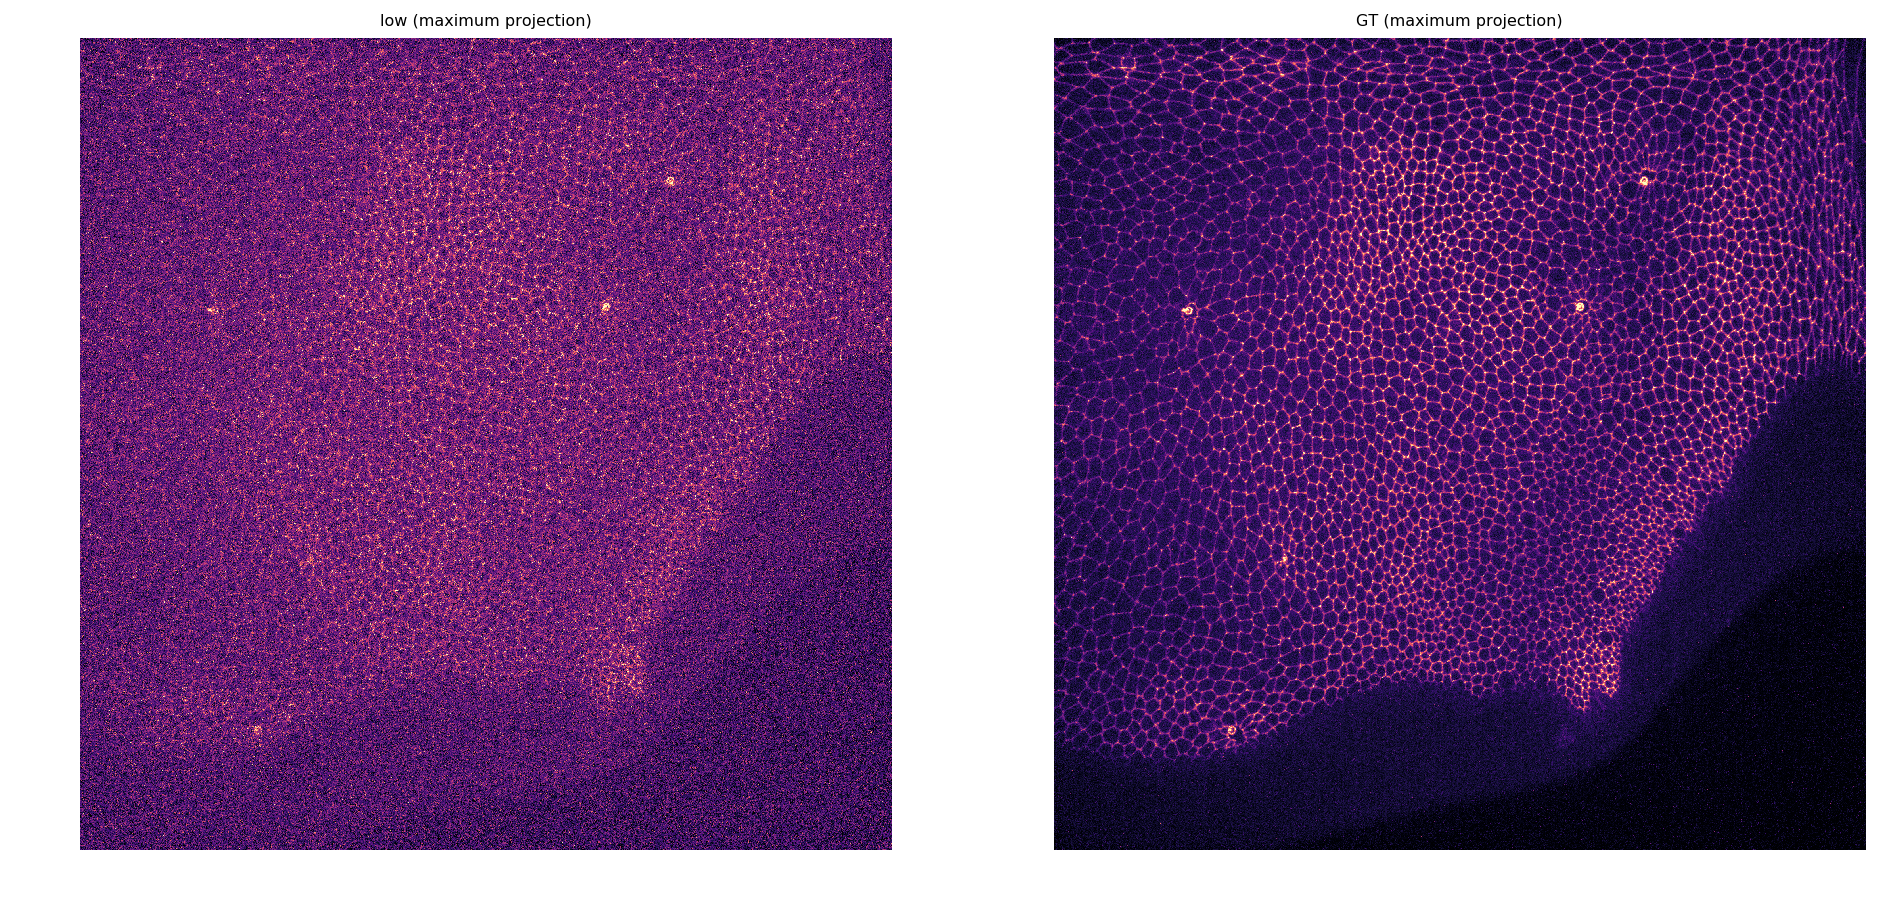

In [9]:
y = imread('/data/u934/service_imagerie/v_kapoor/PairTrainingData/GT/S2/40x_bin1_05_5min_1_w2CSU-488_s2_t26.tif')
x = imread('/data/u934/service_imagerie/v_kapoor/PairTrainingData/Low/S2/40x_bin1_05_5min_1_w2CSU-488_s2_t26.tif')
print('image size =', x.shape)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

In [6]:
raw_data = RawData.from_folder (
    basepath    = '/data/u934/service_imagerie/v_kapoor/PairTrainingData',
    source_dirs = ['Low/S2'],
    target_dir  = 'GT/S2',
    axes        = 'ZYX',
)

In [7]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (16,64,64),
    n_patches_per_image = 512,
    save_file           = '/data/u934/service_imagerie/v_kapoor/PairTrainingData/DenoisingS1S2_training_data.npz',
)

   17 raw images x    1 transformations   =    17 images
   17 images     x  512 patches per image =  8704 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/PairTrainingData: target='GT/S1', sources=[u'Low/S1'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
16 x 64 x 64



100%|██████████| 17/17 [04:19<00:00, 15.24s/it]


Saving data to /data/u934/service_imagerie/v_kapoor/PairTrainingData/DenoisingS1S2_training_data.npz.


In [ ]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

In [ ]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;